In [1]:
import numpy as np
import scib_metrics as sm
import pandas as pd
import scanpy as sc

import seaborn as sb
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [2]:
path_fig='/om2/user/khrovati/data/cross_system_integration/figures/'

## Graph (LISI) vs distance metrics (ASW)

In [3]:
# Prepare mock data
n_noise=15
n=100
group=np.array(['a']*n+['b']*n) # Batch of cell type
group2=np.array(['l']*2*n) # Needed for batch metrics - all cells same label
np.random.seed(0)
xs=[]
for i in range (10):
    x_diff=np.concatenate(
        [np.random.normal(0,1,size=(n,1)),
         np.random.normal(1,1,size=(n,1))])
    x_noise=np.random.normal(0,1,size=(2*n,n_noise))
    x=np.concatenate([x_diff,x_noise],axis=1)
    xs.append(x)

In [4]:
res=[]
for n_small in range(0,n_noise+1,3):
    print(n_small)
    for i,x in enumerate(xs):
        # Make some noise features smaller
        x_sub=x.copy()
        x_sub[:,1:n_small+1]=x_sub[:,1:n_small+1]/10

        # Metrics
        asw_batch=sm.silhouette_batch( X=x_sub, labels=group2, batch=group, rescale = True)
        asw_label=sm.silhouette_label(X=x_sub, labels=group, rescale = True)
        adata=sc.AnnData(x_sub)
        sc.pp.neighbors(adata,use_rep='X')
        ilisi=sm.ilisi_knn(X=adata.obsp['distances'], batches=group, scale=True)
        clisi=sm.clisi_knn(X=adata.obsp['distances'], labels=group, scale= True)
        for metric,bio_batch,value in [
            ('asw','batch',asw_batch),
            ('asw','bio',asw_label),
            ('lisi','batch',ilisi),
            ('lisi','bio',clisi)
        ]:
            res.append({'i':i,'N low var. noise feats.':n_small,'metric':metric,'type':bio_batch,'value':value})
res=pd.DataFrame(res)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


0


/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/

3
6
9
12
15


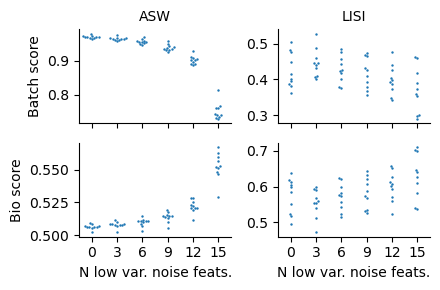

In [5]:
g=sb.catplot(x='N low var. noise feats.',y='value',col='metric',row='type',data=res,kind='swarm',
           sharey=False,height=1.5,aspect=1.5,s=3)
for ax in g.axes.ravel():
    text=ax.title.get_text()
    if text=='type = batch | metric = asw':
        ax.set_title('ASW',fontsize=10)
        ax.set_ylabel('Batch score')
    elif text=='type = bio | metric = asw':
        ax.set_ylabel('Bio score')
        ax.set_title(None)
    elif text=='type = batch | metric = lisi':
        ax.set_title('LISI',fontsize=10)
    else:
        ax.set_title(None)
    ax.set(facecolor = (0,0,0,0))
g.fig.set(facecolor = (0,0,0,0))
plt.tight_layout()
plt.savefig(path_fig+'metric_bias-n_noise_ASW_LISI-swarm.pdf',dpi=300,bbox_inches='tight')
plt.savefig(path_fig+'metric_bias-n_noise_ASW_LISI-swarm.png',dpi=300,bbox_inches='tight')

C: The background is set as non-transparent in jupyter lab, but is in fact transparent (e.g. if you copy the plot)